# Technology focus: CosMx
This notebook will present a rough overview of the plotting functionalities that `spatialdata` implements for COSMX data.

## Loading the data
Please download the data from here: [CosMx dataset](https://s3.embl.de/spatialdata/spatialdata-sandbox/cosmx_io.zip) and adjust the variable containing the location of the `.zarr` file.


In [1]:
cosmx_zarr_path = "./cosmx.zarr"

In [2]:
import warnings

import spatialdata as sd

warnings.filterwarnings("ignore")

cosmx_sdata = sd.read_zarr(cosmx_zarr_path)
cosmx_sdata

SpatialData object with:
├── Images
│     ├── '1_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '2_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '3_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '4_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '5_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '6_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '7_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '8_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '9_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '10_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '11_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '12_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '13_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '14_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '15_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '16_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '17_image': SpatialImage[cyx] (3, 3648, 5472)
│     ├── '18_image':

## Visualise the data
As we can see, the data contains 30 slides which would make plotting very cumbersome. Thereofore, we will only focus on one coordinate systems for now (`2`) but then also later provide a plot of all coordinate systems. Let's visualise some of the data contained in the `spatialdata` object. For this, we will need to load the `spatialdata-plot` library.

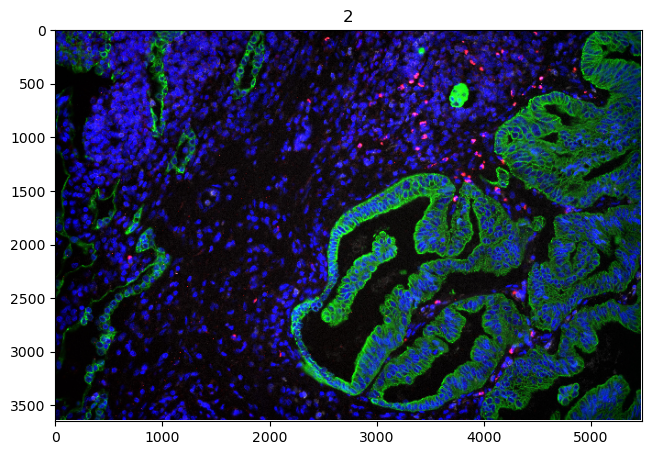

In [3]:
import spatialdata_plot

cosmx_sdata.pl.render_images().pl.show(coordinate_systems=["2"])

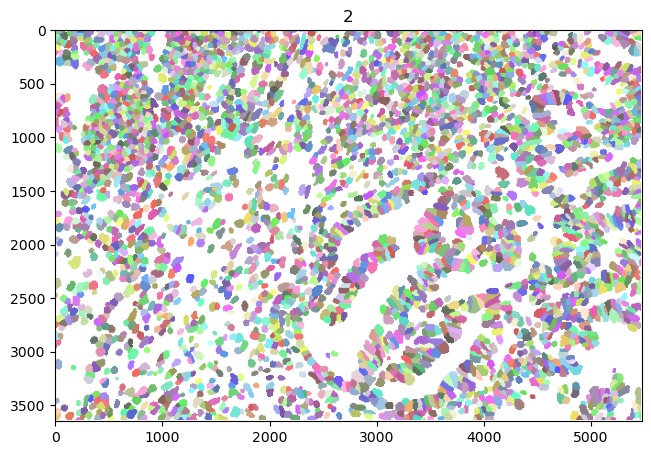

In [4]:
cosmx_sdata.pl.render_labels().pl.show(coordinate_systems=["2"])

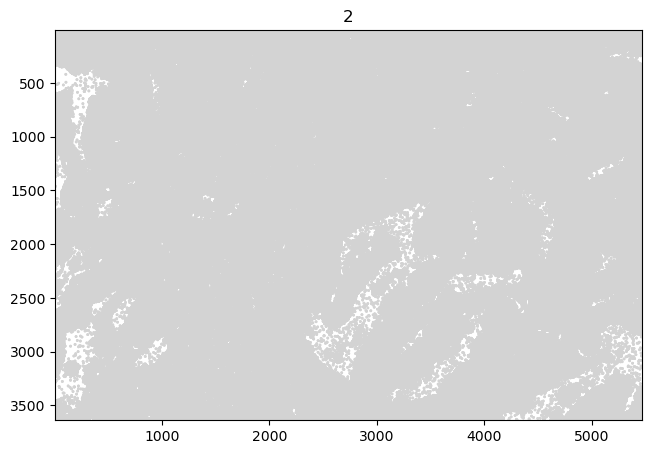

In [5]:
cosmx_sdata.pl.render_points().pl.show(coordinate_systems=["2"])

We can see that the points layer features too many points to properly visualise in a small'ish plot. Therefore, we reduce their number to only 1 % of the total.

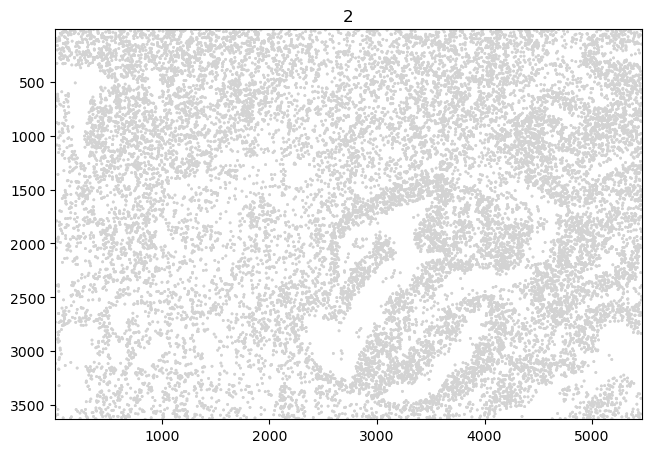

In [6]:
cosmx_sdata.points["2_points"] = cosmx_sdata.points["2_points"].sample(frac=0.01)
cosmx_sdata.pl.render_points().pl.show(coordinate_systems=["2"])

 Furthermore, we are going to convert the `CellComp` column of the points layer to a categorical column. This will allow us to colour the points by their cell type.

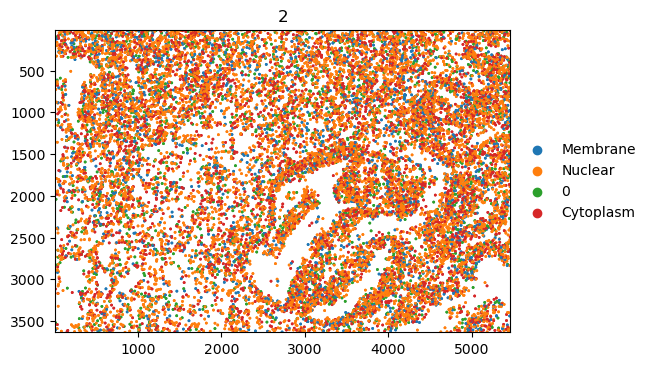

In [7]:
import pandas as pd

cat_type = pd.CategoricalDtype(cosmx_sdata.points["2_points"]["CellComp"].unique())
cosmx_sdata.points["2_points"]["CellComp"] = cosmx_sdata.points["2_points"]["CellComp"].astype(cat_type)

cosmx_sdata.pl.render_points(color="CellComp").pl.show(coordinate_systems=["2"])

We can further overlay that information with the cell_labels. This will allow us to see which points actually lay inside the borders of an annotated cell.

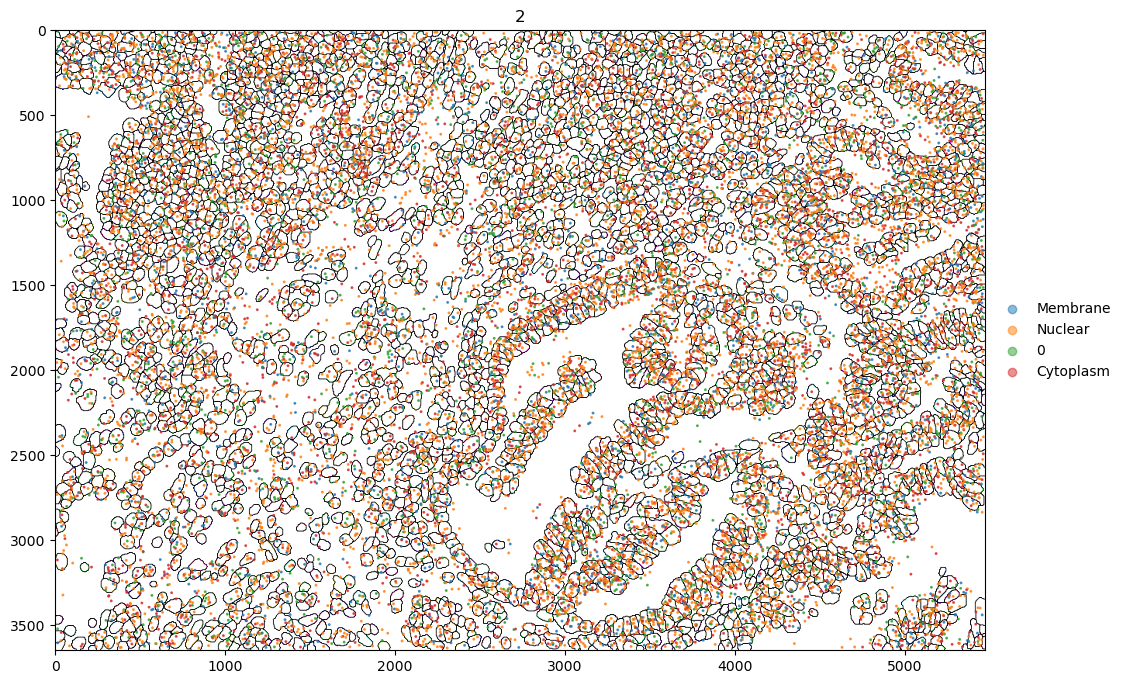

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))

# As you can see here we use a fill_alpha of 1. This is because of a bug when trying to plot purely the
# outline. This issue is described here: https://github.com/scverse/spatialdata-plot/issues/240
(
    cosmx_sdata.pl.render_points(elements="2_points", color="CellComp", alpha=0.5)  #
    .pl.render_labels(elements="2_labels", fill_alpha=1, outline=True, contour_px=3)
    .pl.show(coordinate_systems=["2"], ax=ax)
)

We can see, that the `0` label locates outside of the annotated cells. Finally, let's visualise all images contained in the data.

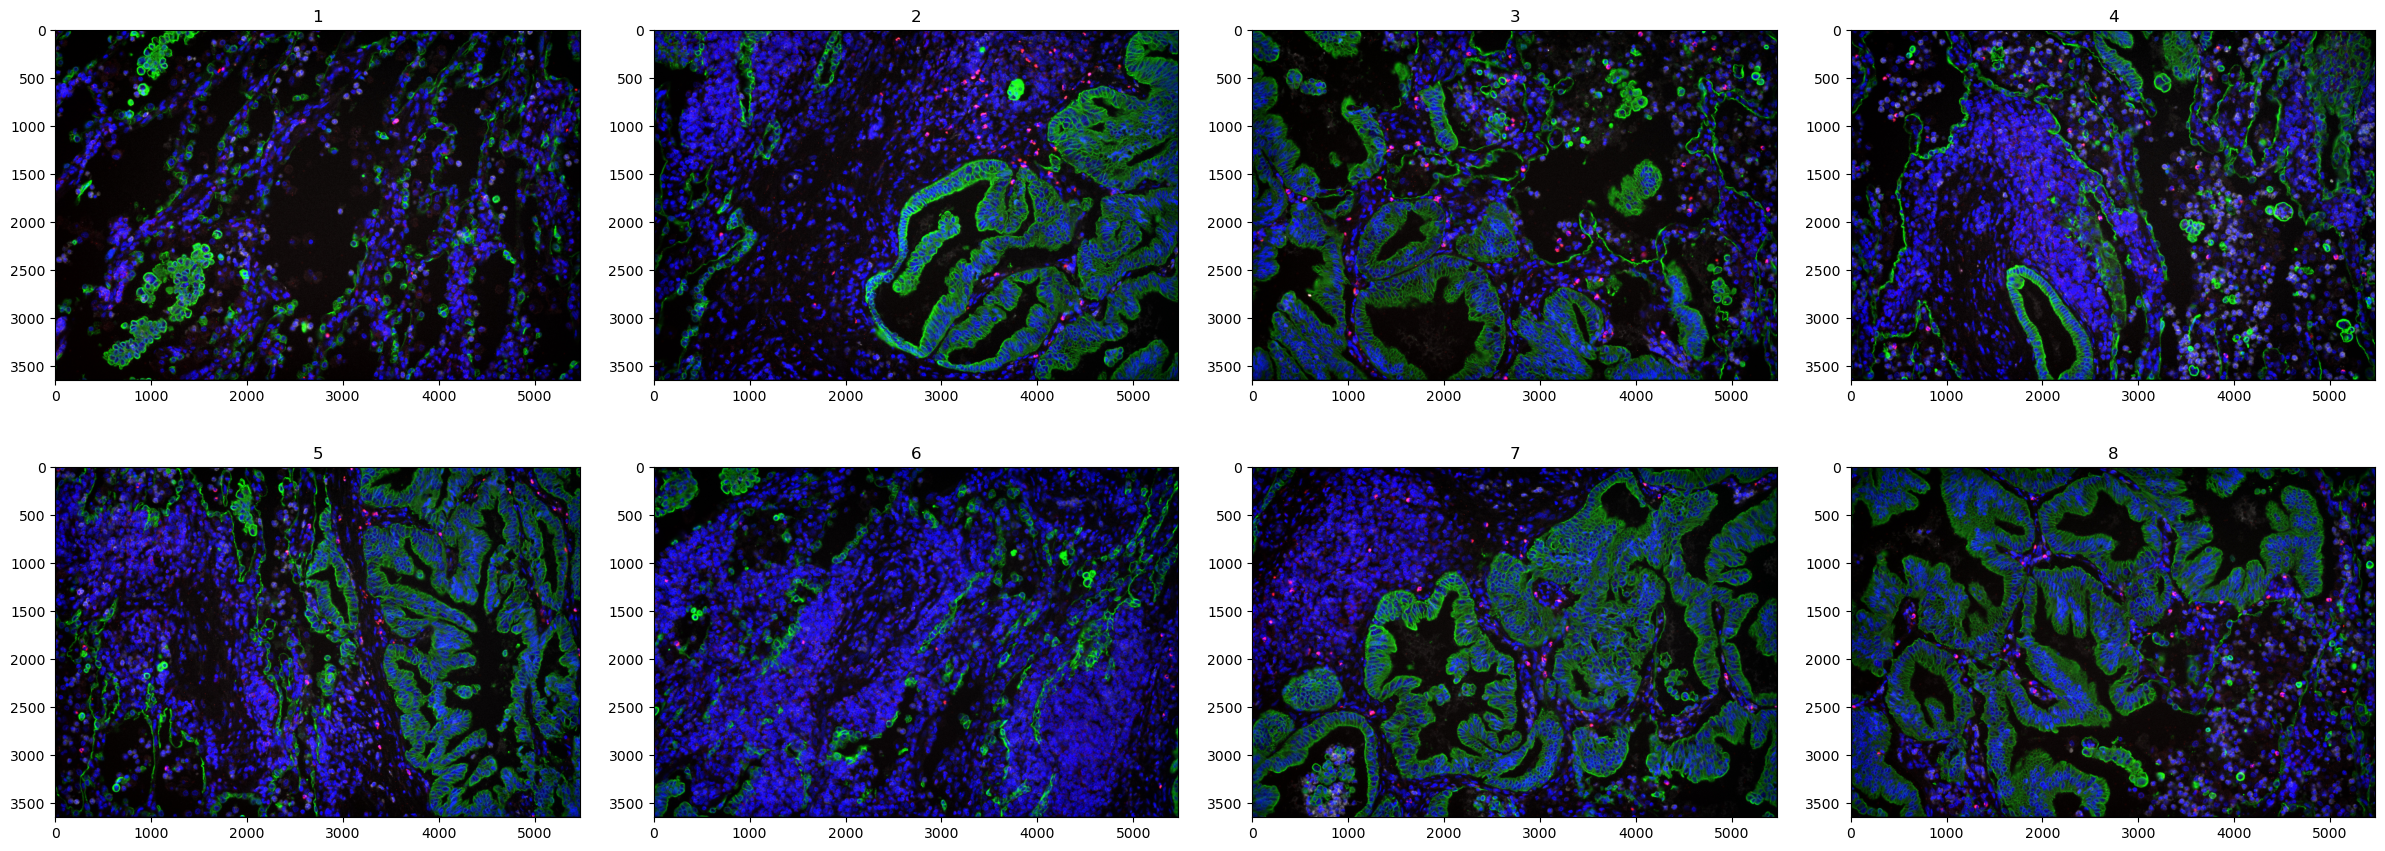

In [10]:
cosmx_sdata.pl.render_images().pl.show(coordinate_systems=[str(i + 1) for i in range(8)])